## Jupyter noteboook - Iris flower data set.

### Iris flower data set
Iris data set is a outcome set of multitude variables of mesurements, which makes it a numerical continuous data set. Edgar Anderson (*1897 - †1969) was a geneticist who collected the data to quantify the morphologic variation of Iris flower of three related species. The data set consist of 50 samples from each of the three species of Iris flower. Four features were measured from each sample. These were the lenght of the sepals and petals and width of sepals and petals. All measurements are in centimeteres. Edgar used these measurements to develop a linear discrimination model to disnquish the species from each other. Data set is ofter reffered as Anderson's Iris data set because of Edgars Anderson.  

<img src=https://raw.githubusercontent.com/MartinRep/FishersIris/master/Assets/Iris_setosa.jpg align="left" alt="Iris Setosa">
<img src=https://raw.githubusercontent.com/MartinRep/FishersIris/master/Assets/Iris_virginica.jpg align="right" alt="Iris Virginica">
<img src=https://raw.githubusercontent.com/MartinRep/FishersIris/master/Assets/Iris_versicolor.jpg align="middle" alt="Iris Versicolor">

[Data Set](http://mlr.cs.umass.edu/ml/machine-learning-databases/iris/iris.data)

### Simple plot
This plot is showing sepal lenght vs sepal width.

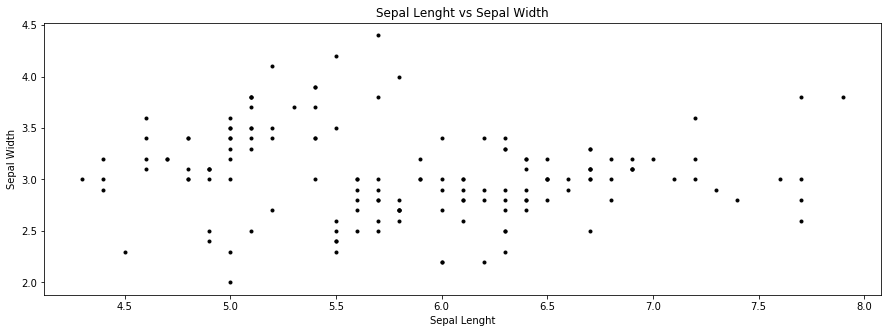

In [1]:
# Adapted from http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15.0, 5.0) # Setting up the plots default size
iris_data = pd.read_csv('irisdataset.csv') # Using pandas library to read data
s_length, s_width, p_length, p_width, iris_type = iris_data['sepal_length'], iris_data['sepal_width'], iris_data['petal_length'], iris_data['petal_width'], iris_data['type']
plt.plot(s_length, s_width, 'k.') # Specifinig only sedal lenght and sedal width
plt.xlabel('Sepal Lenght')
plt.ylabel('Sepal Width')
plt.title('Sepal Lenght vs Sepal Width')
plt.show()

### Colored more complex plot
This plot is color coded and data is separated by the flower type

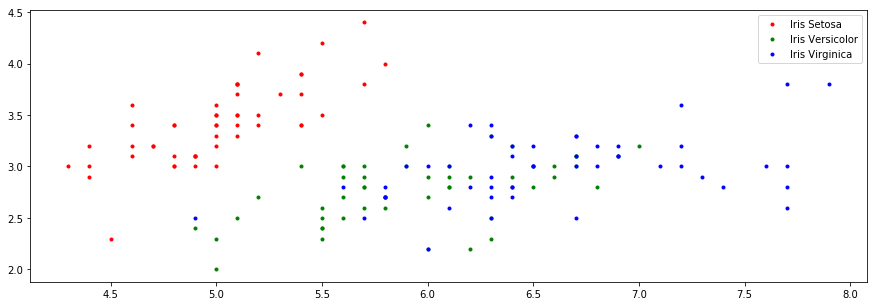

In [2]:
plt.plot(s_length[0:50], s_width[0:50], 'r.', label='Iris Setosa')
plt.plot(s_length[50:100], s_width[50:100], 'g.', label='Iris Versicolor')
plt.plot(s_length[100:], s_width[100:], 'b.', label='Iris Virginica')
plt.legend()
plt.show()

### Scatterplot
Used [Seaborn library](http://seaborn.pydata.org/examples/scatterplot_matrix.html) to create scatterplot matrix of all variables

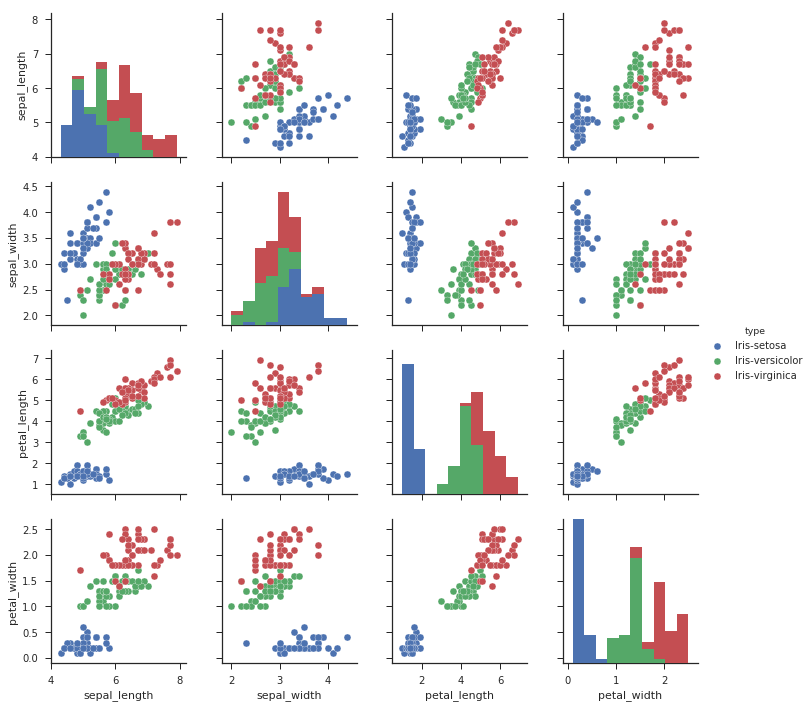

In [3]:
# Adapted from http://seaborn.pydata.org/examples/scatterplot_matrix.html
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(iris_data, hue='type') # Setting up the plot matrix criteria to Iris flower 'type' (column[4])
plt.show()

### Straight line fit for whole data set

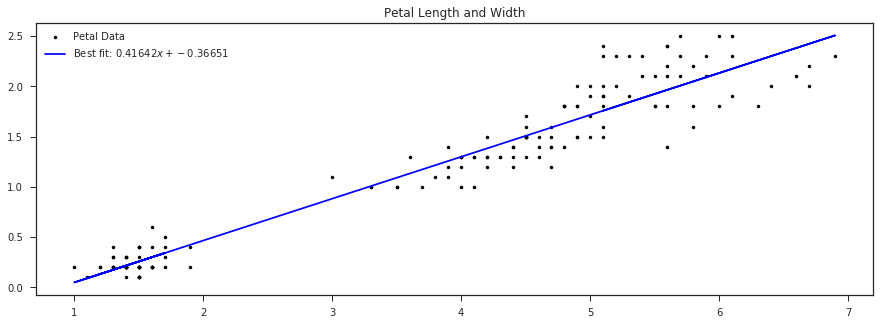

Best fit is m = 0.41642 and c = -0.36651


In [4]:
import numpy as np
m, c = np.polyfit(p_length, p_width, 1)
plt.plot(p_length, p_width, 'k.', label='Petal Data')
plt.plot(p_length, m * p_length + c, 'b-', label='Best fit: %0.5f$ x + %0.5f$' % (m,c))
plt.title('Petal Length and Width')
plt.legend()
plt.show()
print("Best fit is m = %0.5f and c = %0.5f" % (m, c))

### R-square value for the line above
R-Squared is a statisical measure of how close the data are to the fitted regression line. It also known as the coefficient of determination.

In [5]:
rsq = 1.0 - (np.sum((p_width - m * p_length - c)**2)/np.sum((p_width - np.mean(p_width))**2))
print("%0.10f is calculated R-squared value " % rsq)

print("%0.10f is Numpy value" % np.corrcoef(p_length, p_width)[0][1]**2) # numpy implementation of R-square

0.9269012279 is calculated R-squared value 
0.9269012279 is Numpy value


### Line fit for species of Iris Setosa alone
This time we fit a straight line to the variables petal length and petal width of only Setosa type of Iris flower

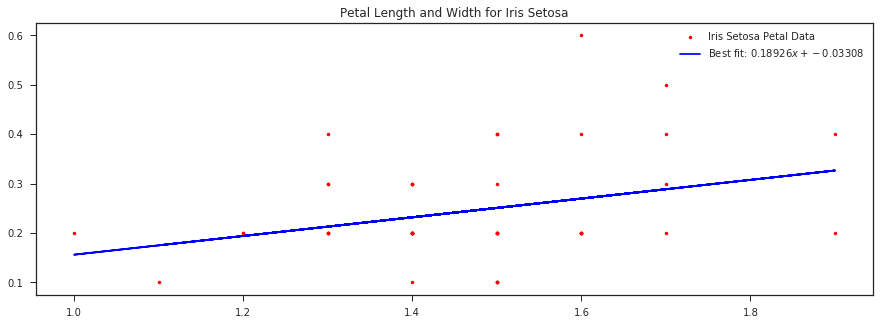

Best fit by Numpy for Iris Setosa is m = 0.18926 and c = -0.03308


In [6]:
m_np, c_np = np.polyfit(p_length[:50], p_width[:50], 1)
plt.plot(p_length[:50], p_width[:50], 'r.', label='Iris Setosa Petal Data')
plt.plot(p_length[:50], m_np * p_length[:50] + c_np, 'b-', label='Best fit: %0.5f$ x + %0.5f$' % (m_np,c_np))
plt.title('Petal Length and Width for Iris Setosa')
plt.legend()
plt.show()
print("Best fit by Numpy for Iris Setosa is m = %0.5f and c = %0.5f" % (m_np, c_np))


### R-square value for the line above (Setosa only)

In [7]:
rsq = 1.0 - (np.sum((p_width[:50] - m * p_length[:50] - c)**2)/np.sum((p_width[:50] - np.mean(p_width[:50]))**2))
print("%0.10f is calculated R-squared value " % rsq)

print("%0.10f is Numpy value" % np.corrcoef(p_length[:50], p_width[:50])[0][1]**2) # numpy implementation of R-square

-0.0414006796 is calculated R-squared value 
0.0938247202 is Numpy value


### Gradient Descent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point. If instead one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent [Ref Wiki](https://en.wikipedia.org/wiki/Gradient_descent)  

Here we gonna calculate the approximate best line fit for petal lenght and petal width for Iris Setosa values only.

In [8]:
def grad_m(x, y, m, c):
    return -2.0 * np.sum(x * (y - m * x - c))

def grad_c(x, y, m , c):
    return -2.0 * np.sum(y - m * x - c)

eta = 0.005
m, c = 1.0, -1.0
change = True

while change:
    m_new = m - eta * grad_m(p_length[:50], p_width[:50], m, c)
    c_new = c - eta * grad_c(p_length[:50], p_width[:50], m, c)
    if m == m_new and c == c_new:
        change = False
    else:
        m, c = m_new, c_new

print("m: %0.15f  c: %0.15f" % (m, c))

m: 0.189262472885034  c: -0.033080260303689


### Comparison

In [9]:
c_dif = c - c_np
m_dif = m - m_np
print("The difference between c calculated by Np and c approximated by Gradient dexcent is %.20f" % c_dif)
print("The difference between m calculated by Np and m approximated by Gradient dexcent is %0.20f" % m_dif)

The difference between c calculated by Np and c approximated by Gradient dexcent is -0.00000000000000147798
The difference between m calculated by Np and m approximated by Gradient dexcent is 0.00000000000000102696


### Conclusion
As we can see by the difference calculated above, gradient descent is very accurate method. As shown above difference between calculations done by numpy library is almost none existing.